# Treinamento de modelo a partir de um dataset do kaggle

Vamos usar várias técnicas para treinar o modelo

In [7]:
'''pip install wordcloud
pip install seaborn
pip install nltk
pip install imbalanced-learn
pip install unidecode'''

'pip install wordcloud\npip install seaborn\npip install nltk\npip install imbalanced-learn\npip install unidecode'

In [8]:
'''nltk.download('all')'''

"nltk.download('all')"

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
from nltk import ngrams
import seaborn as sns
import unidecode
import numpy as np

In [10]:
caminho = r"C:\Users\gabri\sentimental analysis\sentimentalanalisysagro\archive\sentiment_analysis_pt_br.csv"
dados = pd.read_csv(caminho)

In [11]:
dados.head()

,Sentence,Sentiment
0,A tecnologia GeoSolutions aproveitará as soluç...,positive
1,"$ Esi em baixos, queda de US $ 1,50 a US $ 2,5...",negative
2,"No último trimestre de 2010, as vendas líquida...",positive
3,De acordo com a Câmara de Comércio Finlandesa-...,neutral
4,A empresa de compra sueca vendeu sua participa...,neutral


In [12]:
dados.shape

(5842, 2)

In [13]:
dados.value_counts("Sentiment")

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

# Transformando dados em númericos

In [14]:
# usando a técnica de bag of words

vetorizar = CountVectorizer(lowercase = False, max_features = 50)

bag_of_words = vetorizar.fit_transform(dados.Sentence)
print(bag_of_words.shape)

(5842, 50)


In [15]:
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, dados.Sentiment, random_state = True)

In [16]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
acuracia = regressao_logistica.score(x_teste, y_teste)
print(acuracia)

0.5550992470910335


In [17]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    # Passo de vetorizar
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    # Separando dados para treino e teste
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    # Regressão logistica
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

In [18]:
classificar_texto(dados, 'Sentence', 'Sentiment')

Acurácia do modelo com 'Sentence': 58.25%


In [19]:
# Criamos essa forma de visualização para melhorar a análise da frequencia de palavras
def grafico_frequencia(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequencia, x="Palavra", y ="Frequência", color='gray')
    ax.set(ylabel="Contagem")
    plt.show()

In [20]:
# Nuvem de palavras: usamos isso para ter uma visualização de quais palavras são mais frequentes
def nuvem_palavras(texto, coluna_texto, sentimento):
  texto_sentimento = texto.query(f"Sentiment == '{sentimento}'")[coluna_texto]

  texto_unido = ' '.join(texto_sentimento)
  nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110, collocations=False).generate(texto_unido)

  plt.figure(figsize = (10, 7))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

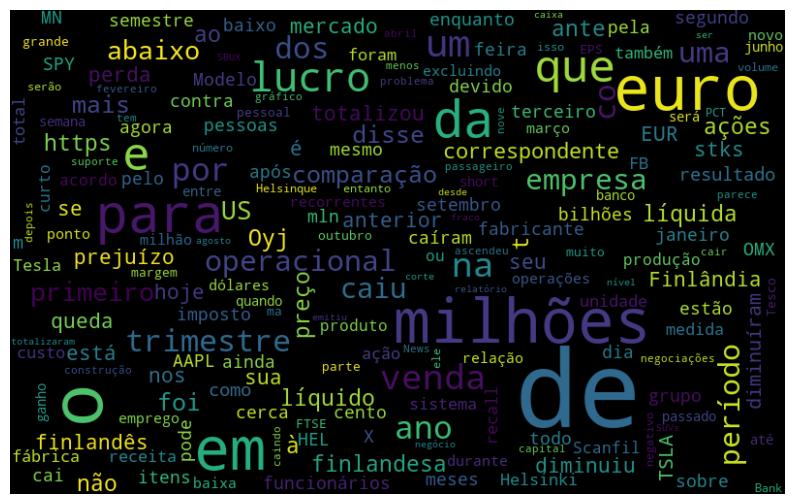

In [21]:
nuvem_palavras(dados, 'Sentence', 'negative')

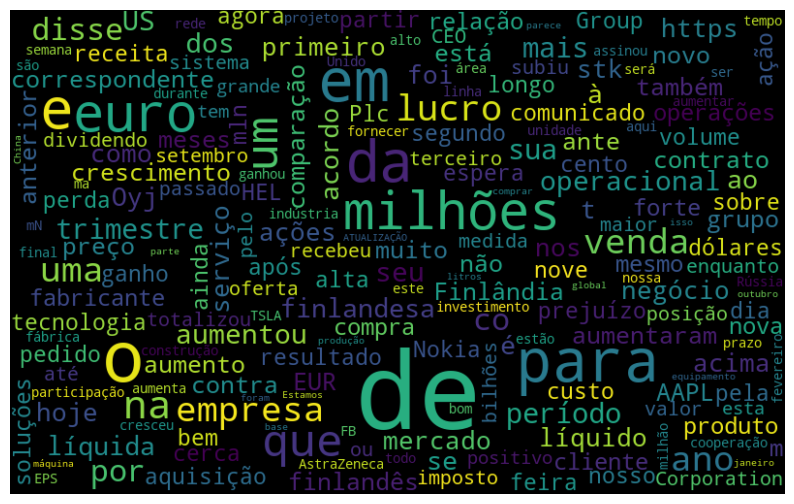

In [22]:
nuvem_palavras(dados, 'Sentence', 'positive')

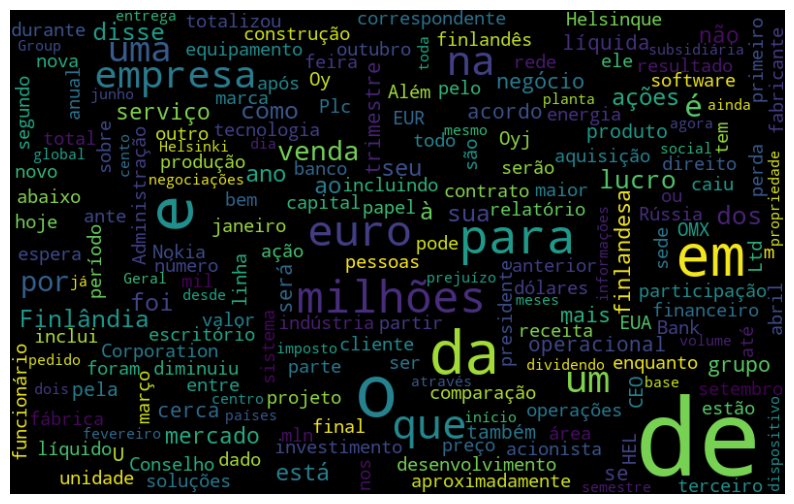

In [23]:
nuvem_palavras(dados, 'Sentence', 'neutral')

Aqui vemos que os dados tem muitas palavras desnecessárias como 'de', 'em' e outros...
Vamos fazer uma limpeza para melhorar isso

# Tokenização

In [24]:
todas_palavras = ' '.join([texto for texto in dados.Sentence])

In [25]:
# Vamos iniciar vendo a frequencia de cada palavra

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
token_frase

['A',
 'tecnologia',
 'GeoSolutions',
 'aproveitará',
 'as',
 'soluções',
 'GPS',
 'da',
 'Benefon,',
 'fornecendo',
 'tecnologia',
 'de',
 'pesquisa',
 'baseada',
 'em',
 'localização,',
 'uma',
 'plataforma',
 'de',
 'comunidades,',
 'conteúdo',
 'multimídia',
 'relevante',
 'de',
 'localização',
 'e',
 'um',
 'novo',
 'e',
 'poderoso',
 'modelo',
 'comercial.',
 '$',
 'Esi',
 'em',
 'baixos,',
 'queda',
 'de',
 'US',
 '$',
 '1,50',
 'a',
 'US',
 '$',
 '2,50',
 'BK',
 'uma',
 'possibilidade',
 'real',
 'No',
 'último',
 'trimestre',
 'de',
 '2010,',
 'as',
 'vendas',
 'líquidas',
 'da',
 'Componente',
 'dobraram',
 'para',
 '131m',
 'a',
 'partir',
 'de',
 '76',
 'milhões',
 'de',
 'euros',
 'para',
 'o',
 'mesmo',
 'período',
 'do',
 'ano',
 'anterior,',
 'enquanto',
 'passavam',
 'para',
 'um',
 'lucro',
 'pré-imposto',
 'zero',
 'com',
 'uma',
 'perda',
 'antes',
 'de',
 'impostos',
 'de',
 'euros.',
 'De',
 'acordo',
 'com',
 'a',
 'Câmara',
 'de',
 'Comércio',
 'Finlandesa-Rússi

In [26]:
frequencia = nltk.FreqDist(token_frase)

In [27]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})
df_frequencia.head()

,Palavra,Frequência
0,A,1374
1,tecnologia,76
2,GeoSolutions,1
3,aproveitará,1
4,as,568


In [28]:
df_frequencia.nlargest(columns='Frequência', n=10)

,Palavra,Frequência
10,de,11340
22,e,2602
34,a,2482
13,em,2421
7,da,2124
47,para,1970
53,o,1800
51,milhões,1614
56,do,1441
0,A,1374


In [29]:
## removendo stop words, retiramos elas pois podem aumentar o ruído do modelo diminuindo assim a eficácia

palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [30]:
frase_processada = []

for opiniao in dados.Sentence:
  palavras_texto = token_espaco.tokenize(opiniao)
  # para cada opnião iremos tokenizar o texto e na nova_frase vamos guardar uma variavel sem as palavras irrelevantes
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_1'] = frase_processada

In [31]:
classificar_texto(dados, 'tratamento_1', 'Sentiment')

Acurácia do modelo com 'tratamento_1': 59.89%


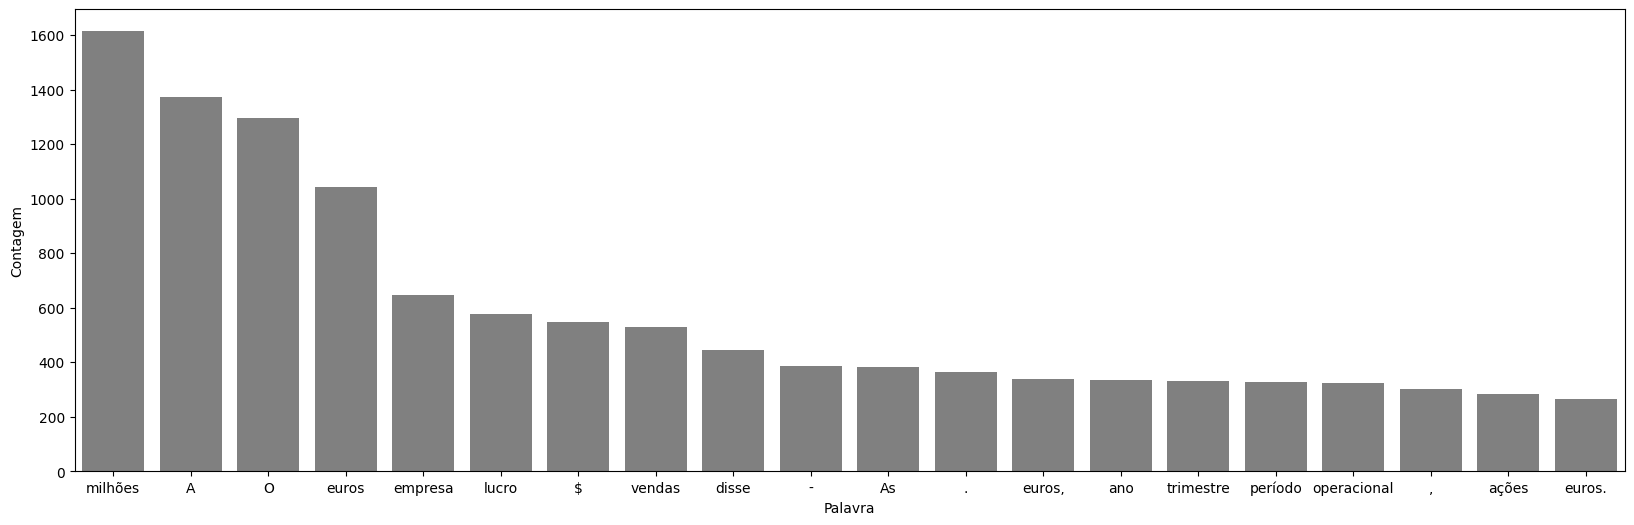

In [32]:
grafico_frequencia(dados, 'tratamento_1',20)

In [33]:
#removendo pontuações
frase_processada = []
token_pontuacao = tokenize.WordPunctTokenizer()

for opiniao in dados['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_2'] = frase_processada

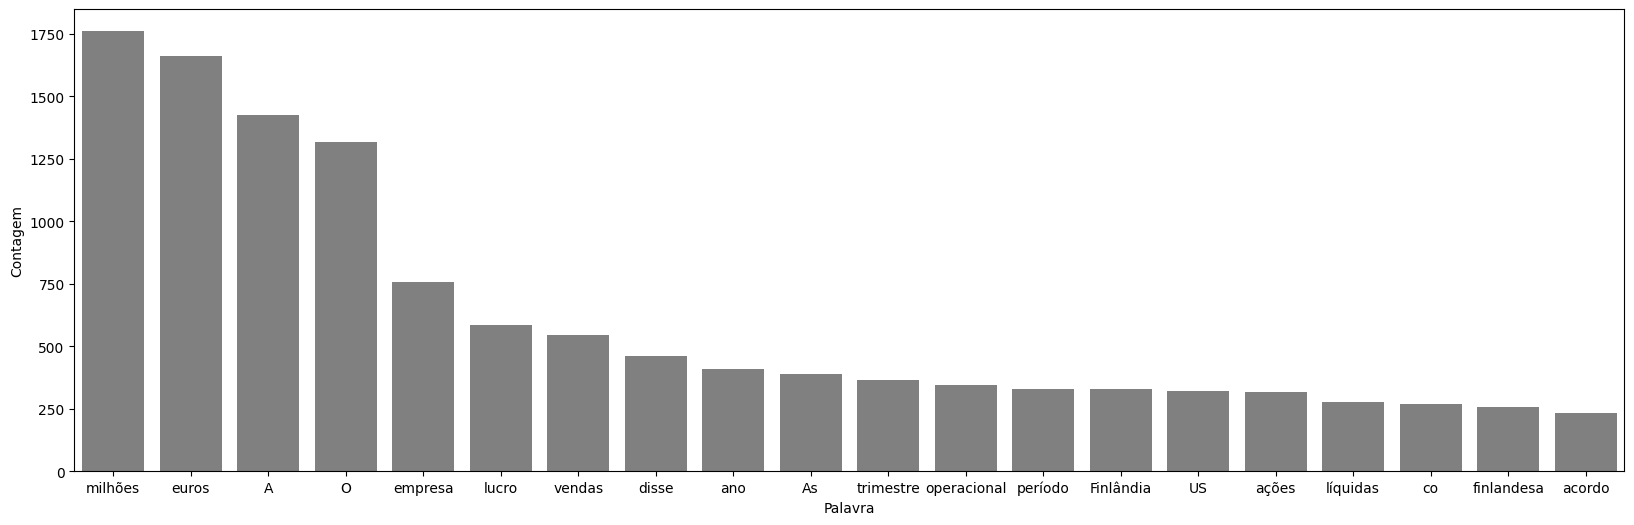

In [34]:
grafico_frequencia(dados, 'tratamento_2', 20)

In [35]:
# Removendo acentuação
sem_acentos = [unidecode.unidecode(texto) for texto in dados.tratamento_2]

stop_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [36]:
dados['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in dados.tratamento_3:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_sem_acento]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_3'] = frase_processada

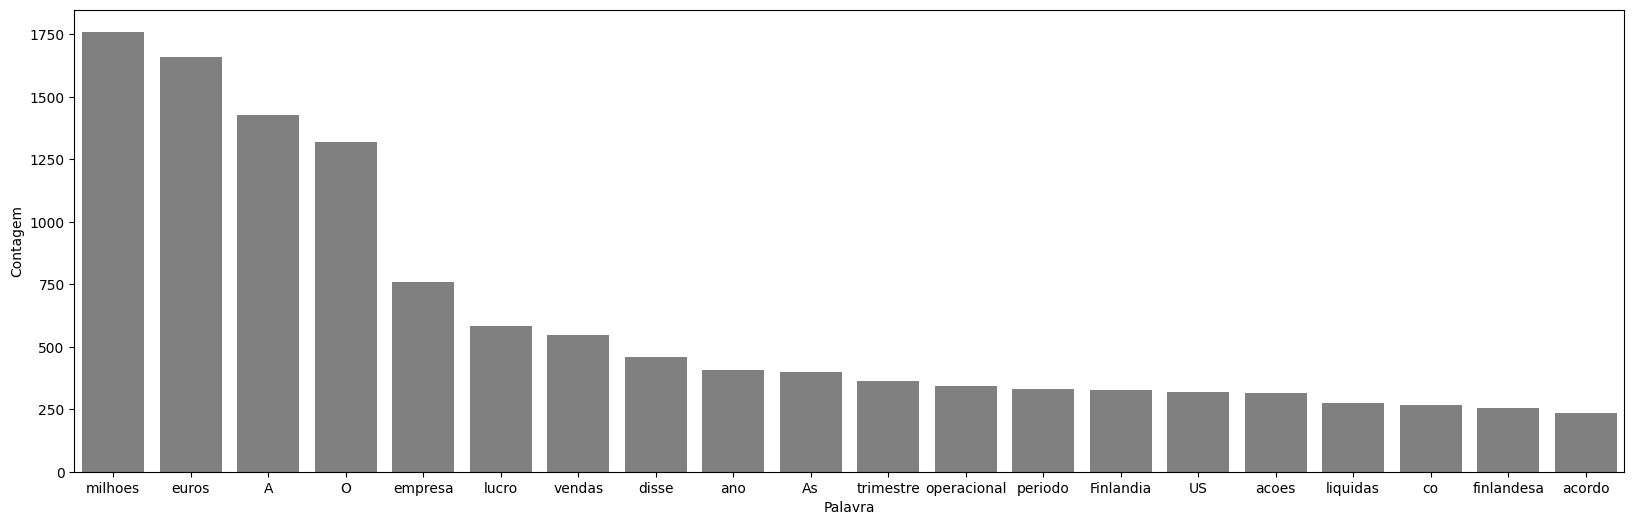

In [37]:
grafico_frequencia(dados, 'tratamento_3', 20)

In [38]:
frase_processada = []
# Colocando tudo em letras minusculas

for opiniao in dados['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stop_sem_acento]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_4'] = frase_processada

In [39]:
classificar_texto(dados, 'tratamento_4', 'Sentiment')

Acurácia do modelo com 'tratamento_4': 59.41%


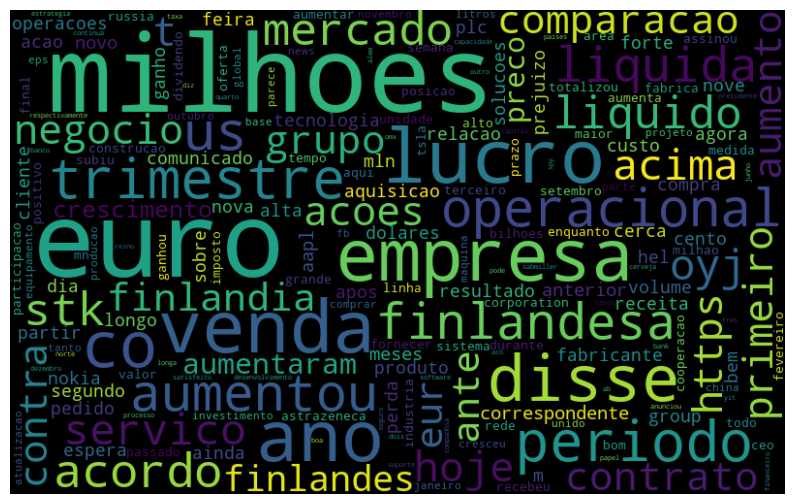

In [40]:
nuvem_palavras(dados, 'tratamento_4', 'positive')

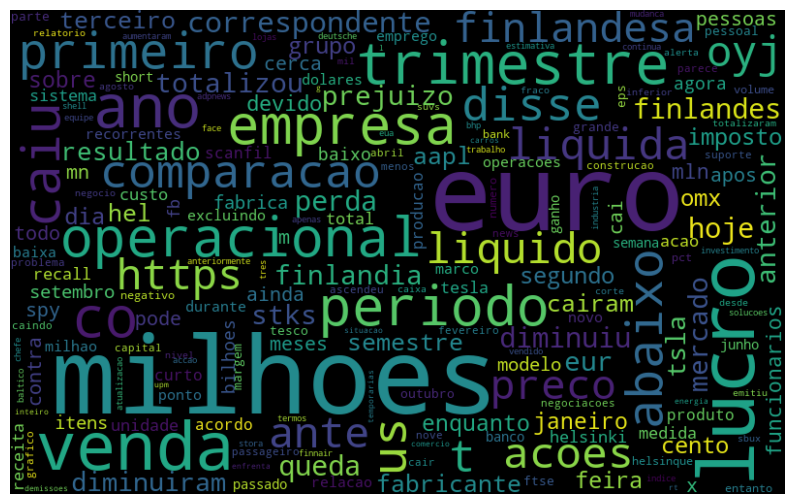

In [41]:
nuvem_palavras(dados, 'tratamento_4', 'negative')

# Stemmer

Stemmer é uma ferramenta de processamento de linguagem natural (PLN) utilizada para reduzir palavras ao seu radical ou raiz comum. O objetivo principal é eliminar variações morfológicas das palavras, como sufixos, prefixos ou terminações, sem necessariamente produzir uma palavra válida no idioma. Isso ajuda a unificar palavras semelhantes em análises textuais.

Exemplo: 'gostei', 'gostado', 'gostar' podem ser reduzidas ao mesmo radical 'gost'.

In [42]:
stemmer = nltk.RSLPStemmer()

In [43]:
# simplificando as palavras

frase_processada = []

for opiniao in dados['tratamento_4']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto if palavra not in stop_sem_acento]
  frase_processada.append(' '.join(nova_frase))

dados['tratamento_5'] = frase_processada

In [44]:
classificar_texto(dados, 'tratamento_5', 'Sentiment')

Acurácia do modelo com 'tratamento_5': 63.04%


# TFIDF

O TF-IDF (Term Frequency-Inverse Document Frequency) é uma técnica de ponderação de palavras amplamente utilizada em processamento de linguagem natural (PLN) e mineração de textos. Seu objetivo é medir a *importância* de uma palavra em um documento em relação a um conjunto de documentos (corpus), ajudando a identificar os termos mais relevantes para análise.

In [45]:
tfidf = TfidfVectorizer(lowercase = False, max_features=50)
tfidf_bruto = tfidf.fit_transform(dados.Sentence)
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")

Acurácia do modelo: 56.26%


In [46]:
tfidf_tratados = tfidf.fit_transform(dados.tratamento_5)
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia = regressao_logistica.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")

Acurácia do modelo: 60.78%


In [47]:
#Capturando contextos

tfidf_50 = TfidfVectorizer(lowercase = False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(dados.tratamento_5)

X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'acuracia do modelo: {acuracia_ngrams*100:.2f}')

acuracia do modelo: 59.69


In [48]:
tfidf_100 = TfidfVectorizer(lowercase = False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(dados.tratamento_5)

X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'acuracia do modelo: {acuracia_ngrams*100:.2f}')

acuracia do modelo: 62.22


Vamos escolher esse modelo tfidf_1000 pois foi o modelo com melhor acurácia até o momento

In [49]:
tfidf_1000 = TfidfVectorizer(lowercase = False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(dados.tratamento_5)

X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, dados.Sentiment, random_state=True)
regressao_logistica.fit(X_treino, y_treino)
acuracia_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'acuracia do modelo: {acuracia_ngrams*100:.2f}')

acuracia do modelo: 70.02


In [112]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_1000.get_feature_names_out()
)
pesos.nlargest(10, columns=0)

,0
qued,2.795991
caiu,2.642356
abaix,2.566163
diminu,2.451985
cair,2.294500
spy,2.009142
cai,1.931374
perd,1.700986
frac,1.566199
inferi,1.522901


In [50]:
# Convertendo a matriz esparsa para densa (somente para visualização de uma amostra)
print("Matriz TF-IDF (amostra de 5 linhas):")
print(vetor_tfidf.toarray()[:5])

Matriz TF-IDF (amostra de 5 linhas):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Balanceando o modelo

In [52]:

# Criando o vetor TF-IDF a partir dos textos tratados
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1, 2))
vetor_tfidf = tfidf_1000.fit_transform(dados.tratamento_5)

# Convertendo os labels para numéricos, se necessário (já que são strings)
y = dados['Sentiment']

# Aplicando o SMOTE para balancear os dados
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(vetor_tfidf, y)

# Dividindo os dados balanceados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

# Treinando o modelo de Regressão Logística
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)

# Calculando a acurácia no conjunto de teste
acuracia_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo após balanceamento: {acuracia_ngrams * 100:.2f}%')


Acurácia do modelo após balanceamento: 74.28%


# F1-Score

In [55]:
# Prevendo os valores no conjunto de teste
y_pred = regressao_logistica.predict(X_teste)

# Calculando o F1-score
f1 = f1_score(y_teste, y_pred, average='macro')  # Use 'macro' para múltiplas classes
print(f'F1-score (macro): {f1:.2f}')

# Exibindo o relatório de classificação completo
print("\nRelatório de classificação:")
print(classification_report(y_teste, y_pred))

F1-score (macro): 0.74

Relatório de classificação:
              precision    recall  f1-score   support

    negative       0.71      0.83      0.77       631
     neutral       0.78      0.65      0.71       632
    positive       0.76      0.74      0.75       615

    accuracy                           0.74      1878
   macro avg       0.75      0.74      0.74      1878
weighted avg       0.75      0.74      0.74      1878



# Fine-Tunning

# Importando o modelo

In [ ]:
import joblib

# Salvando o TF-IDF vectorizer
joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')

# Salvando o modelo treinado (regressão logística)
joblib.dump(regressao_logistica, 'regressao_logistica.pkl')

print("Modelo e vectorizador TF-IDF salvos com sucesso!")